## Inspecting the tf run output for the custom kanto classifier


### Inspect the files contents

In [12]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import os

# Path to your .tfevents file
tfevents_paths = [
    "../final-runs/custom_kanto/events.out.tfevents.first_part.0",
    "../final-runs/custom_kanto/events.out.tfevents.second_part.0",
]

# Read the file and print available tags and data
print("Reading tfevents files...\n")
for tfevents_path in tfevents_paths:
    print(f"Processing file: {os.path.basename(tfevents_path)}")
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            print(f"Step: {event.step}, Tag: {value.tag}, Value: {value.simple_value}")


Reading tfevents files...

Processing file: events.out.tfevents.first_part.0
Step: 46, Tag: Batch Loss, Value: 5.50496244430542
Step: 56, Tag: Batch Loss, Value: 4.533810615539551
Step: 66, Tag: Batch Loss, Value: 4.098556041717529
Step: 76, Tag: Batch Loss, Value: 3.6152420043945312
Step: 86, Tag: Batch Loss, Value: 3.432711362838745
Step: 1, Tag: Epoch Training Loss, Value: 4.078725814819336
Step: 1, Tag: Epoch Training Accuracy, Value: 12.155929565429688
Step: 1, Tag: Training Precision, Value: 10.692795753479004
Step: 1, Tag: Training Recall, Value: 10.684614181518555
Step: 1, Tag: Training F1 Score, Value: 10.333765983581543
Step: 1, Tag: Training Learning Rate, Value: 0.0010000000474974513
Step: 2, Tag: Epoch Validation Accuracy, Value: 22.705312728881836
Step: 2, Tag: Epoch Validation Loss, Value: 3.258694887161255
Step: 2, Tag: Epoch Validation Precision, Value: 25.049352645874023
Step: 2, Tag: Epoch Validation Recall, Value: 20.713184356689453
Step: 2, Tag: Epoch Validation F1

In [13]:
# Check each unique tag in the file

tags = set()
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            tags.add(value.tag)

print("\nUnique tags in the file:")
for tag in tags:
    print(tag)


Unique tags in the file:
Class Accuracy/Poliwrath
Class Accuracy/Arbok
Class Accuracy/Gyarados
Class Accuracy/Magikarp
Class Accuracy/Sandslash
Class Accuracy/Kabuto
Class Accuracy/Mew
Class Accuracy/Exeggcute
Class Accuracy/Ponyta
Class Accuracy/Ekans
Class Accuracy/Poliwhirl
Training Precision
Class Accuracy/Venomoth
Class Accuracy/Tauros
Class Accuracy/Bellsprout
Class Accuracy/Koffing
Class Accuracy/Nidorino
Class Accuracy/Diglett
Class Accuracy/Alakazam
Class Accuracy/Abra
Class Accuracy/Exeggutor
Class Accuracy/Fearow
Class Accuracy/Doduo
Class Accuracy/Pidgeot
Class Accuracy/Seadra
Class Accuracy/Dragonair
Class Accuracy/Zapdos
Class Accuracy/Omanyte
Class Accuracy/Spearow
Class Accuracy/Vulpix
Class Accuracy/Magneton
Class Accuracy/Butterfree
Class Accuracy/Machamp
Class Accuracy/Hitmonlee
Class Accuracy/Squirtle
Class Accuracy/Lickitung
Class Accuracy/Metapod
Class Accuracy/Golbat
Class Accuracy/Pinsir
Class Accuracy/Venusaur
Class Accuracy/Poliwag
Class Accuracy/Golem
Class 

Epoch 1: Training Loss = 4.078725814819336
Epoch 1: Training Accuracy = 12.155929565429688
Epoch 2: Validation Accuracy = 22.705312728881836
Epoch 2: Validation Loss = 3.258694887161255
Epoch 2: Training Loss = 2.8676917552948
Epoch 2: Training Accuracy = 28.973695755004883
Epoch 3: Validation Accuracy = 46.46464538574219
Epoch 3: Validation Loss = 2.2485878467559814
Epoch 3: Training Loss = 2.2990078926086426
Epoch 3: Training Accuracy = 46.090965270996094
Epoch 4: Validation Accuracy = 55.731224060058594
Epoch 4: Validation Loss = 1.898392677307129
Epoch 4: Training Loss = 1.9404600858688354
Epoch 4: Training Accuracy = 54.994876861572266
Epoch 5: Validation Accuracy = 62.40667724609375
Epoch 5: Validation Loss = 1.6342562437057495
Epoch 5: Training Loss = 1.7085877656936646
Epoch 5: Training Accuracy = 61.03167724609375
Epoch 6: Validation Accuracy = 66.08110046386719
Epoch 6: Validation Loss = 1.5016059875488281
Epoch 6: Training Loss = 1.5339431762695312
Epoch 6: Training Accuracy

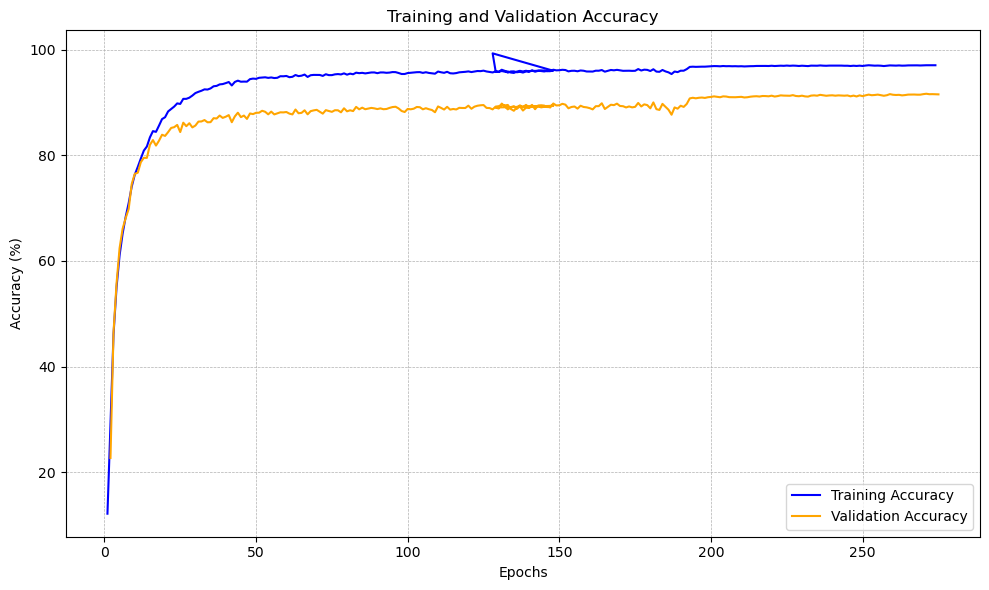

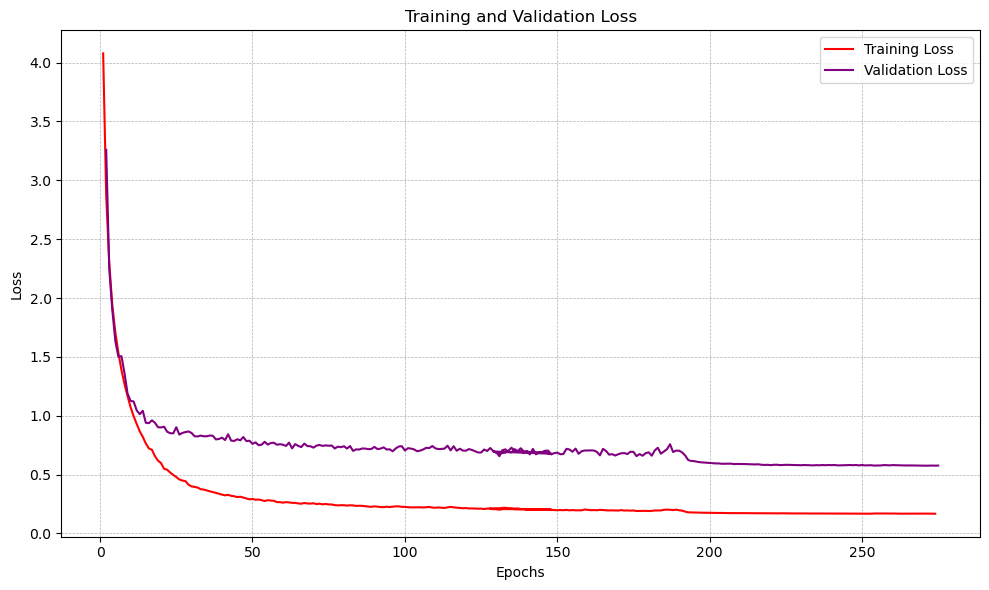

In [14]:
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt


# Initialize empty lists for metrics
epoch_steps_train = []
epoch_train_accuracy = []
epoch_train_loss = []
epoch_steps_val = []
epoch_val_accuracy = []
epoch_val_loss = []

# Initalize empty lists for batch metrics
batch_steps_train = []
batch_loss = []

# Parse the tfevents file
for tfevents_path in tfevents_paths:
    for summary in summary_iterator(tfevents_path):
        for value in summary.summary.value:
            if value.tag == "Epoch Training Accuracy":  # Training accuracy
                epoch_steps_train.append(summary.step)
                print(f"Epoch {summary.step}: Training Accuracy = {value.simple_value}")
                epoch_train_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Validation Accuracy":  # Validation accuracy
                print(f"Epoch {summary.step}: Validation Accuracy = {value.simple_value}")
                epoch_steps_val.append(summary.step)
                epoch_val_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Training Loss":  # Training loss
                print(f"Epoch {summary.step}: Training Loss = {value.simple_value}")
                epoch_train_loss.append(value.simple_value)
            elif value.tag == "Epoch Validation Loss": # Validation loss
                print(f"Epoch {summary.step}: Validation Loss = {value.simple_value}")
                epoch_val_loss.append(value.simple_value)
            elif value.tag == "Batch Loss":  # Batch loss
                batch_steps_train.append(summary.step)
                batch_loss.append(value.simple_value)

#print final values
print("\n")
print("Final epoch: ", epoch_steps_train[-1])
print("Final Training Accuracy: ", epoch_train_accuracy[-1])
print("Final Validation Accuracy: ", epoch_val_accuracy[-1])
print("Final Training Loss: ", epoch_train_loss[-1])
print("Final Validation Loss: ", epoch_val_loss[-1])
print("Final Batch Loss: ", batch_loss[-1])

# Plot 1: Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_accuracy, label="Training Accuracy", color="blue")
plt.plot(epoch_steps_val, epoch_val_accuracy, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_loss, label="Training Loss", color="red")
plt.plot(epoch_steps_val, epoch_val_loss, label="Validation Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


# # Plot 3: Batch Loss
# plt.figure(figsize=(10, 6))
# plt.plot(batch_steps_train, batch_loss, label="Batch Loss", color="green", linestyle="-.")
# plt.xlabel("Steps")
# plt.ylabel("Loss")
# plt.title("Batch Loss")
# plt.legend()
# plt.grid(visible=True, linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.show()



Reading tfevents file...

Top 10 Best Class Accuracies:
1. Blastoise: 100.00%
2. Oddish: 100.00%
3. Paras: 100.00%
4. Tentacruel: 100.00%
5. Vaporeon: 100.00%
6. Eevee: 98.18%
7. Pinsir: 97.92%
8. Cubone: 97.83%
9. Weepinbell: 97.78%
10. Electabuzz: 97.73%


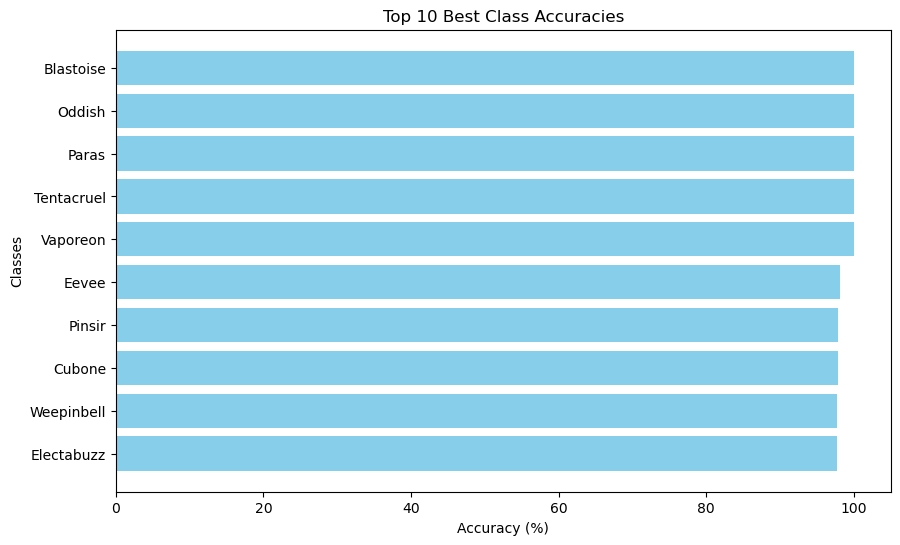

Top 10 Worst Class Accuracies:
1. Muk: 65.71%
2. Nidoran-m: 70.59%
3. Onix: 73.08%
4. Poliwrath: 77.55%
5. Marowak: 78.05%
6. Poliwhirl: 78.33%
7. Rhyhorn: 78.57%
8. Weezing: 78.57%
9. Ninetales: 80.00%
10. Venonat: 80.00%


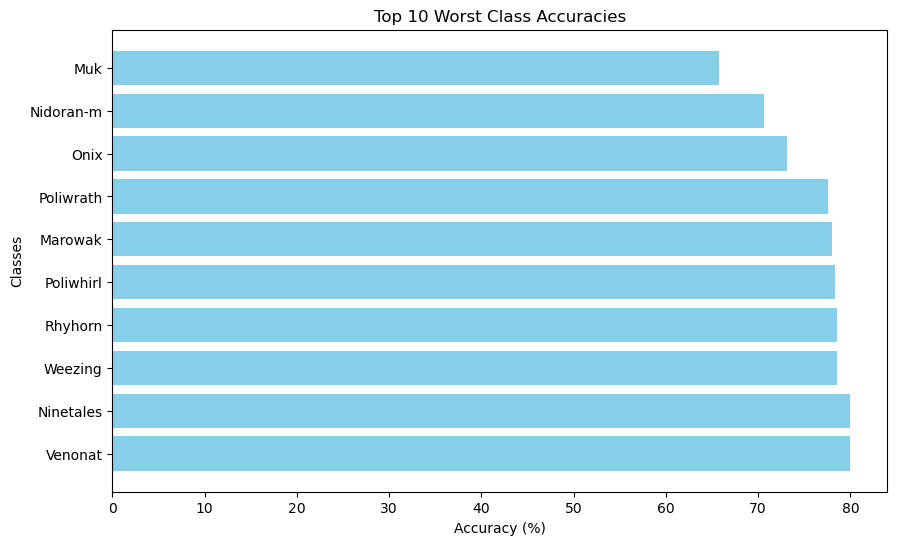

In [15]:
# Get top 10 best class accuracy

from tensorflow.python.summary.summary_iterator import summary_iterator
import re
import matplotlib.pyplot as plt

# Path to your .tfevents file
tfevents_paths = [
    "../final-runs/custom_kanto/events.out.tfevents.first_part.0",
    "../final-runs/custom_kanto/events.out.tfevents.second_part.0",
]

# Regex pattern to match "Class Accuracy/*"
pattern = r"Class Accuracy/([\w\s-]+)"

# Dictionary to store class accuracies
class_accuracies = {}

# Read the tfevents file
print("Reading tfevents file...\n")
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            # Check if the tag matches "Class Accuracy/*"
            match = re.match(pattern, value.tag)
            if match:
                class_name = match.group(1)  # Extract class name
                class_accuracies[class_name] = value.simple_value  # Store the accuracy

# Sort the classes by accuracy in descending order and select the top 10
top_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*top_10)

# Print the top 10 class accuracies
print("Top 10 Best Class Accuracies:")
for i, (class_name, accuracy) in enumerate(top_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Best Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# now lets get the worst 10 class accuracy
worst_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=False)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*worst_10)

# Print the top 10 class accuracies
print("Top 10 Worst Class Accuracies:")
for i, (class_name, accuracy) in enumerate(worst_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Worst Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



